In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

abalone_path = join('data','abalone.txt') # 전복 데이터. join(하위 폴더이름, 파일이름)
column_path = join('data','abalone_attributes.txt') #특징 데이터

abalone_columns = list() #특징들을 담을 변수로 리스트 선언. abalone_columns = [] 가능
for l in open(column_path): #open명령어로 파일을 열 수 있다.
    abalone_columns.append(l.strip())

In [2]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
label = data['Sex']


In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

In [5]:
del data['Sex']
#라벨을 하나 뺄 수 있다. del 함수로 말이다. 문자열 데이터 삭제
data.shape

(4177, 8)

In [6]:
data.describe()
#판단스 라이브러리의 df.describe()함수로 각 변수별 평균, 표준편차, 최대, 최소, 사분위수 등의 기초 통계량을 확인가능

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
data.info()
#데이터 형식을 확인가하는 pandas의 df.info() 함수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [8]:
#sklearn에서 Min-Max Scalar는 preprocessing 패키지에 있고 0~1사이의 값을 갖는다.



data = (data - np.min(data))/(np.max(data)-np.min(data))

In [9]:
# 1) 모델 불러오기 및 정의하기
from sklearn.preprocessing import MinMaxScaler #Scaler 스펠링 주의. ler을 lar를 사용한다.
mMscaler = MinMaxScaler() 

In [10]:
# 2) 데이터에서 특징 찾기(Min, Max 값)
mMscaler.fit(data)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
# 3) 데이터 변환-1. 따로하기 mMscaled_data=mMscaler.transform(data)
# 3-2 특징찾는 것과 변환하는 것을 같이 하기
mMscaled_data = mMscaler.fit_transform(data) #numpy를 매개인자로 가짐을 확인하는 습관


In [12]:
# 4) 결과 살펴보기
mMscaled_data = pd.DataFrame(mMscaled_data, columns = data.columns)
mMscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [13]:
#2. Standard Scaling으로 표준정규분포화로 스케일링. z-score

In [14]:
#1. 모델 불러오기
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

In [15]:
#2. 데이터에서 특징 찾기(meand, std 값)
sdscaler.fit(data)

StandardScaler()

In [16]:
#3. 데이터 변환
sdscaled_data = sdscaler.transform(data)

In [17]:
#4. 결과 살펴보기
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [18]:
sdscaled_data=pd.DataFrame(sdscaled_data,columns=data.columns)

In [19]:
sdscaled_data.head() #MinMax랑 달리 Standard scaling은 음수값이 나올 수 있다.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


### 

In [20]:
# 샘플링
#1. 모델링 불러오기 및 정의하기

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler() #패키지를 이니셜로 전처리하는 변수 만듦
rus = RandomUnderSampler()

In [21]:
#2.3 데이터에서 특징을 학습함과 동시에 데이터 샘플링
# Over 샘플링
oversampled_data, oversampled_label = ros.fit_resample(data,label)
oversampled_data = pd.DataFrame(oversampled_data)

#under 샘플링
undersampled_data, undersampled_label=rus.fit_resample(data,label)
undersampled_data = pd.DataFrame(undersampled_data,columns=data.columns)

In [22]:
#4 결과 살펴보기
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nRandom Over 샘플링 결과\n{}'.format(pd.get_dummies(oversampled_label).sum()))
#200개 증가
print('\nRandom under 샘플링 결과\n{}'.format(pd.get_dummies(undersampled_label).sum()))
#1307개로 동일하게 축소조정

원본 데이터의 클래스 비율 
F    1307
I    1342
M    1528
dtype: int64

Random Over 샘플링 결과
F    1528
I    1528
M    1528
dtype: int64

Random under 샘플링 결과
F    1307
I    1307
M    1307
dtype: int64


In [23]:
from sklearn.datasets import make_classification
data, label = make_classification(n_samples=1000,n_features=2,n_informative=2,
                                 n_redundant=0, n_repeated=0, n_classes=3,
                                 n_clusters_per_class=1,
                                 weights=[0.05, 0.15, 0.8],
                                 class_sep=0.8, random_state=2019)
#features 2개, 분류 class 3개, 각각의 가중치 5%, 15%, 80% 할당


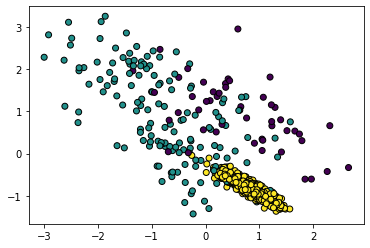

In [24]:
fig = plt.Figure(figsize=(12,6)) #width 12인치, height 6인치
plt.scatter(data[:,0],data[:,1],c=label, linewidth=1, edgecolor='black') #산점도 만들기
plt.show()
#원리 : 가까운 점과 점을 긋고 직선 중간에 점을 찍는다. 막 복제한다.

In [25]:
#1. 모델 불러오기 및 정의하기
from imblearn.over_sampling import SMOTE
# K_neighbors 파라미터로 가까운 데이터 샘플의 수를 결정한다.
smote = SMOTE(k_neighbors=5)

In [26]:
#2,3 데이터에서 특징 찾기(데이터 비율)+데이터 샘플링
smoted_data, smoted_label = smote.fit_resample(data,label)

In [27]:
#4. 결과 살펴보기
print('원본 데이터의 클래스 비율 \n {}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE의 결과\n{}'.format(pd.get_dummies(smoted_label).sum()))
###더 많아진 것(oversampling)확인

원본 데이터의 클래스 비율 
 0     53
1    154
2    793
dtype: int64

SMOTE의 결과
0    793
1    793
2    793
dtype: int64


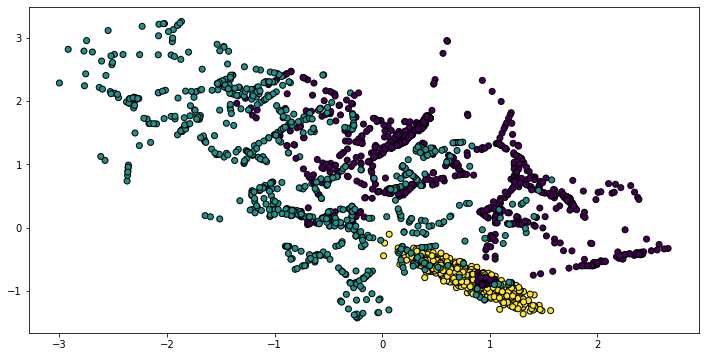

In [28]:
fig = plt.figure(figsize=(12,6))
plt.scatter(smoted_data[:,0], smoted_data[:,1], c=smoted_label, linewidth=1, edgecolor='black')
plt.show()
####기존보다 훨씬 더 많은 점이 찍힌 산점도를 확인했음

In [29]:
#1. 주성분 분석(차원 축소) 모델 불러오기
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #0~1이면 자동으로 축의 개수를 선택(복잡도를 낮춤). 정수면 분류 개수를 수동 설정(시각화에 좋음)


In [30]:
#2. 데이터에서 특징 추출
pca.fit(data)

PCA(n_components=2)

In [31]:
#3. 변환
new_data=pca.transform(data)

In [32]:
print('원본 데이터의 차원\n {}'.format(data.shape))
print('\nPCA를 거친 데이터의 차원\n {}'.format(new_data.shape))

원본 데이터의 차원
 (1000, 2)

PCA를 거친 데이터의 차원
 (1000, 2)


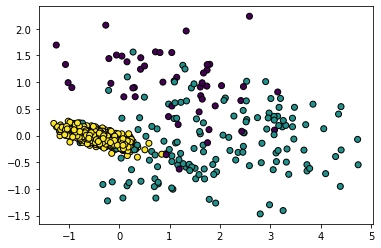

In [33]:
plt.scatter(new_data[:,0], new_data[:,1],c=label, linewidth=1, edgecolor='black')
plt.show()

In [34]:
#숫자 이미지 
from sklearn.datasets import load_digits
digits=load_digits()

In [35]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [36]:
data = digits.data
label = digits.target

In [37]:
data.shape

(1797, 64)

Label :0


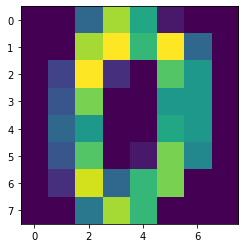

In [38]:
plt.imshow(data[0].reshape((8,8))) #원래 64차원짜리 데이터이다.이를 8*8로 2차원으로 내린다.
print('Label :{}'.format(label[0]))

In [39]:
#숫자 처리 모델 불러오기 및 정의하기
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

In [40]:
pca.fit(data)

PCA(n_components=2)

In [41]:
new_data = pca.transform(data)

In [42]:
print('원본 데이터의 차원\n {}'.format(data.shape))
print('\nPCA를 거친 데이터의 차원\n {}'.format(new_data.shape))
#64차원이 2차원으로 

원본 데이터의 차원
 (1797, 64)

PCA를 거친 데이터의 차원
 (1797, 2)


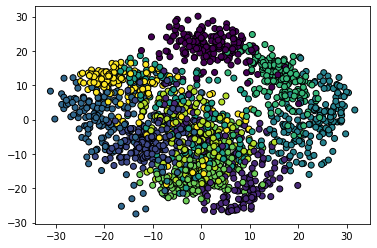

In [43]:
plt.scatter(new_data[:,0], new_data[:,1], c=label, linewidth=1, edgecolor='black')
plt.show()
#이미지임

In [44]:
#숫자값을 예측하는 것이 회귀이다. Label_encoding. 소형0, 중형1, 대형2인데 이게 수학적인 차이가 아니라서 어렵다.
#onehot_encoding은 독립적인 벡터로 만들어서 내적했을 때 0이 되개해서 서로 구분을 시키는 것이다.
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)


In [45]:
label = data['Sex']
del data

In [46]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
le.fit(label)

LabelEncoder()

In [49]:
label_encoded_label = le.transform(label)

In [50]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)),label_encoded_label.reshape((-1,1))],axis=1),columns=['label','label_encoded'])
result.head(10)

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
5,I,1
6,F,0
7,F,0
8,M,2
9,F,0


In [51]:
#레이블로 만든 것을 다시 배열로 만들어준다.
le.inverse_transform(label_encoded_label)

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

In [52]:
# 원핫 인코딩. 모델 불러오기
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)

print(type(label)) #시리즈는 벡터 형태라 안 된다. 시리즈는 데이터프레임(행과 열=표)의 하위형태이다. 
print(type(label.values))
print(type(label.values.reshape((-1,1)))) 


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [53]:
label.values.shape
#label이 벡터 형태로 되어 있기에 바로 transfrom(label.values)할 시 오류 발생

(4177,)

In [54]:
#2. 데이터 특징 찾기
one_hot_encoded = ohe.fit_transform(label.values.reshape((-1,1)))
#차원을 -1,1 의미. 마지막 차원은 1로 설정할거고 나머지는 알아서 해라.
ohe.categories_[0]#categories로 현재 전처리(encode) 된 변수 onehotencoding을 array형태로 변환해줌

array(['F', 'I', 'M'], dtype=object)

In [55]:
one_hot_encoded.shape


(4177, 3)